In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("Crop_recommendation.csv")

In [22]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [23]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [25]:
df.shape

(2200, 8)

In [26]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [27]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [28]:
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Random Forest Tuning

In [31]:
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [32]:
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [33]:
print("\nBest Random Forest Accuracy:", rf_acc)
print("Best Parameters:", rf_grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Best Random Forest Accuracy: 0.9931818181818182
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      0.95      0.97        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98        20
          14

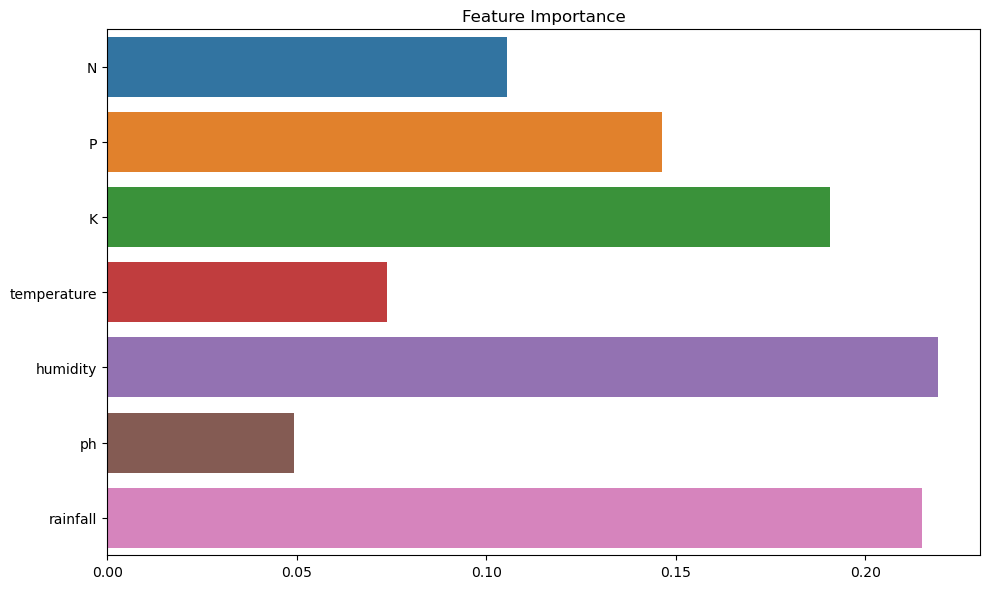

In [34]:
importances = best_rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

## model saved as crop_recommender.pkl

In [ ]:
#joblib.dump(best_rf, "crop_recommender.pkl")

## Label encoder saved as label_encoder.pkl

In [ ]:
#joblib.dump(le, "label_encoder.pkl")

## Scaler saved as 'scaler.pkl

In [ ]:
#joblib.dump(scaler, "scaler.pkl")

## Predicted data

In [40]:
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

sample_df = pd.DataFrame([[90, 42, 43, 20.87, 82.00, 6.50, 202.93]], columns=feature_names)

sample_scaled = scaler.transform(sample_df)

pred_encoded = best_rf.predict(sample_scaled)
pred_label = le.inverse_transform(pred_encoded)

print("\n Recommended Crop:", pred_label[0])


 Recommended Crop: rice
